In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
filepath = 'data/ods047.csv'

In [39]:
df = pd.read_csv(filepath, sep=';', encoding='utf-8')

# select only columns: "DateTime" and "Negative imbalance price"
df = df[['DateTime', 'Negative imbalance price']]

# select only rows where DateTime starts with "2024-03-25"
df = df[df['DateTime'].str.startswith('2024-03-25')]

<Axes: title={'center': 'Negative imbalance price on 2024-03-25'}, xlabel='DateTime'>

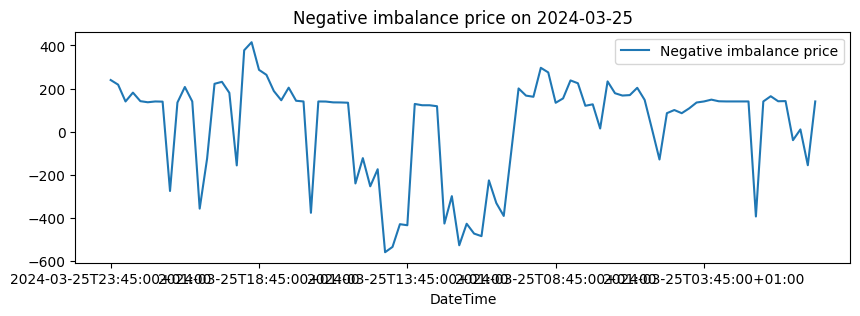

In [40]:
df.plot(x='DateTime', y='Negative imbalance price', title='Negative imbalance price on 2024-03-25', figsize=(10,3))

In [41]:
ev_battery_capacity = 60  # kWh
ev_pmax = 22  # kW
ev_charged_per_quarter = ev_pmax / 4  # kWh

# TODO add ev starting charge level and ev comfort charge level


ev_charging_quarters_needed_count = ev_battery_capacity / ev_charged_per_quarter

total_quarters_count = len(df)

percent_of_quarters_needed = ev_charging_quarters_needed_count / total_quarters_count  # not as a percentage but just as a number between 0 and 1

print(f'EV charging quarters needed: {ev_charging_quarters_needed_count}, which is {percent_of_quarters_needed:.2f} of all quarters')

EV charging quarters needed: 10.909090909090908, which is 0.11 of all quarters


In [42]:
# for each row in the df, calculate if it's in the lowest 10% of them
df['is_in_lowest_quarters'] = df['Negative imbalance price'] <= df['Negative imbalance price'].quantile(percent_of_quarters_needed)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96 entries, 26 to 121
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DateTime                  96 non-null     object 
 1   Negative imbalance price  96 non-null     float64
 2   is_in_lowest_quarters     96 non-null     bool   
dtypes: bool(1), float64(1), object(1)
memory usage: 2.3+ KB


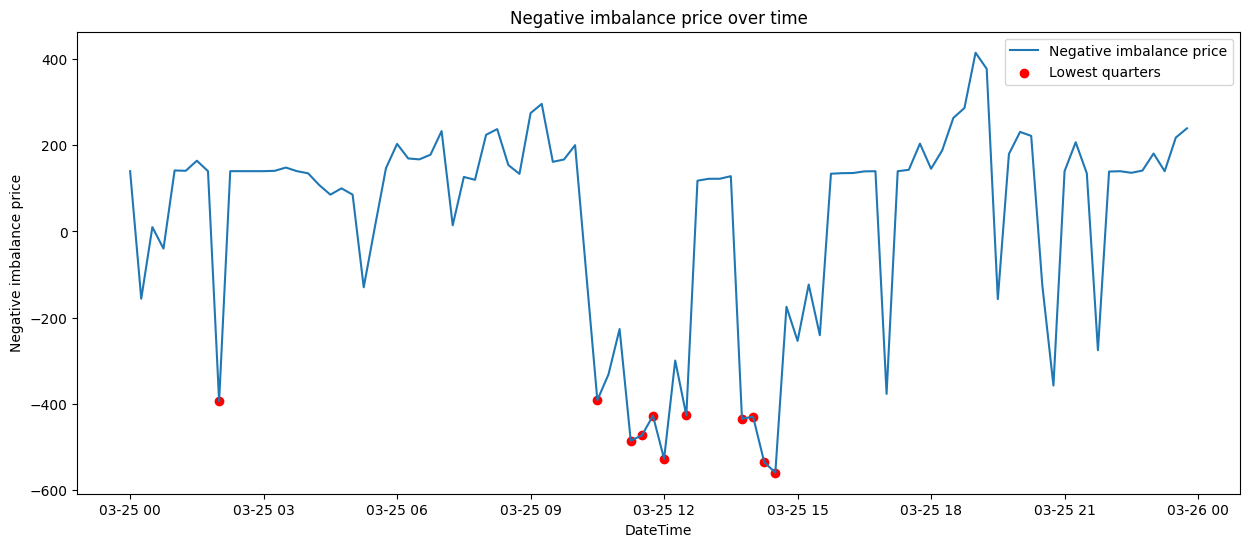

In [46]:
# Assume your dataframe is df
df['DateTime'] = pd.to_datetime(df['DateTime'])  # Ensure DateTime is in the correct format

plt.figure(figsize=(15,6))

# plot all the prices
plt.plot(df['DateTime'], df['Negative imbalance price'], label='Negative imbalance price')

# overlay the points where 'is_in_lowest_quarters' is True
plt.scatter(df[df['is_in_lowest_quarters']]['DateTime'], df[df['is_in_lowest_quarters']]['Negative imbalance price'], color='red', label='Lowest quarters')

plt.xlabel('DateTime')
plt.ylabel('Negative imbalance price')
plt.title('Negative imbalance price over time')
plt.legend()

plt.show()